# Results over re-runs of `word2vec`
Multiple runs over different samples of the same size (15% and 50% of wikipedia)

First 3 samples are random (the first isn't really- it's consecutive files). The last item is averages over the previous 3

In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *
from gui.output_utils import *

sns.set_context("paper")

/Users/miroslavbatchkarov/NetBeansProjects/ExpLosion


In [4]:
d = {'expansions__vectors__rep__in': [0, 1, 2, -1], 
     'document_features_tr': 'J+N+AN+NN',
     'document_features_ev': 'AN+NN', 
     'expansions__vectors__unlabelled_percentage__in': [15, 50], # todo add 50
     'labelled': 'amazon_grouped-tagged', 
     'expansions__vectors__unlabelled': 'wiki', 
     'expansions__vectors__algorithm': 'word2vec',
     'expansions__decode_handler': 'SignifiedOnlyFeatureHandler', 
     'expansions__k': 3, 
     'expansions__noise': 0.0}
exp_ids = Experiment.objects.filter(**d).exclude(expansions__vectors__composer='Verb').values_list('id', flat=True)
print(exp_ids, len(exp_ids))
scores, folds = get_cv_scores_many_experiment(exp_ids)

df = pd.DataFrame({'F1': scores,
                   'cvfold': folds,
                   'rep': get_vectors_field(exp_ids, 'rep'),
                   'percent': get_vectors_field(exp_ids, 'unlabelled_percentage'),
                   'composer': get_vectors_field(exp_ids, 'composer')})
df[(df.cvfold==0) & (df.composer=='Add')].to_html('tmp.html')
df[(df.percent==50) & (df.composer=='Add')].shape
# df = df[(df.cvfold==0)]
# df.to_html('tmp.html')
# !open tmp.html

[42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, '...(remaining elements truncated)...'] 32
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI for exp Experiment object
Calculating CI 

(2000, 5)

(16000, 5)


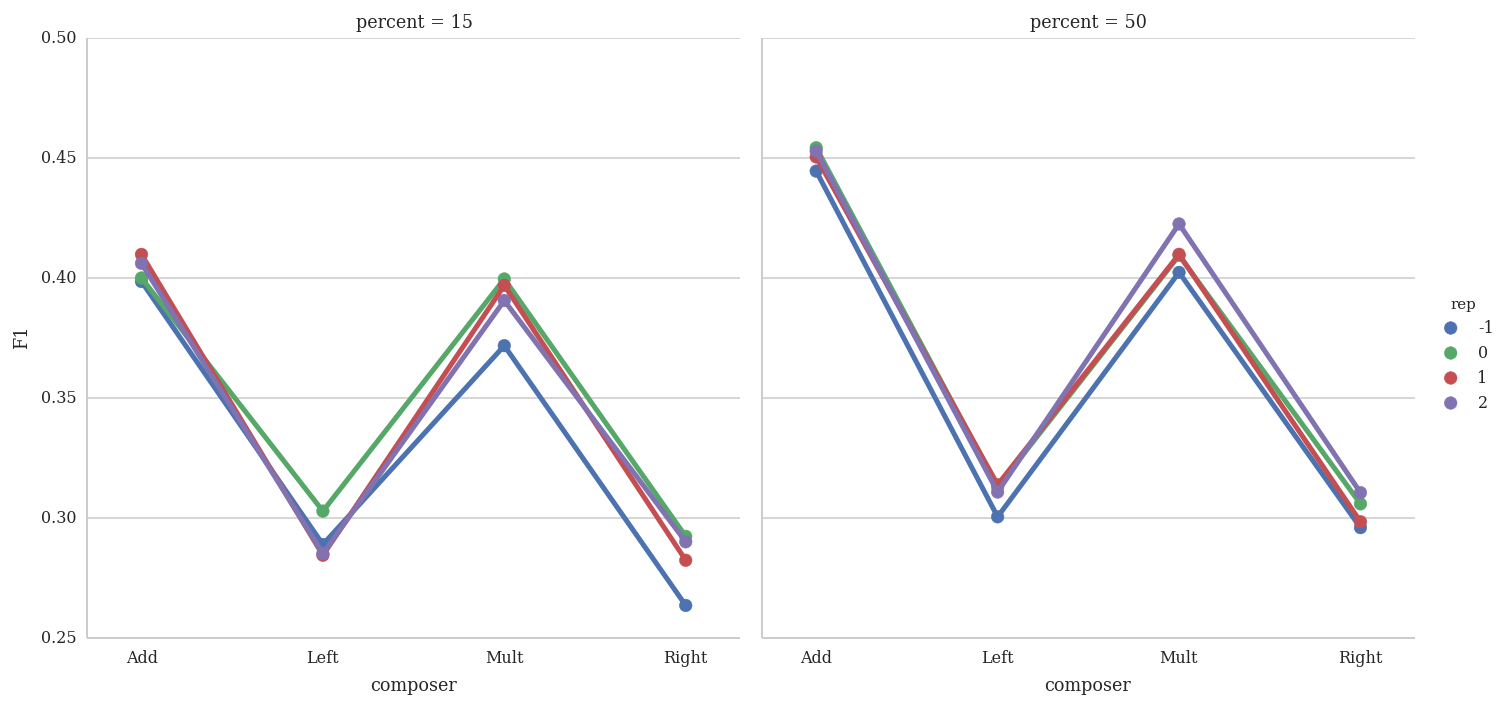

In [6]:
print(df.shape)
sns.factorplot(x='composer', y='F1', col='percent', hue='rep', data=df);

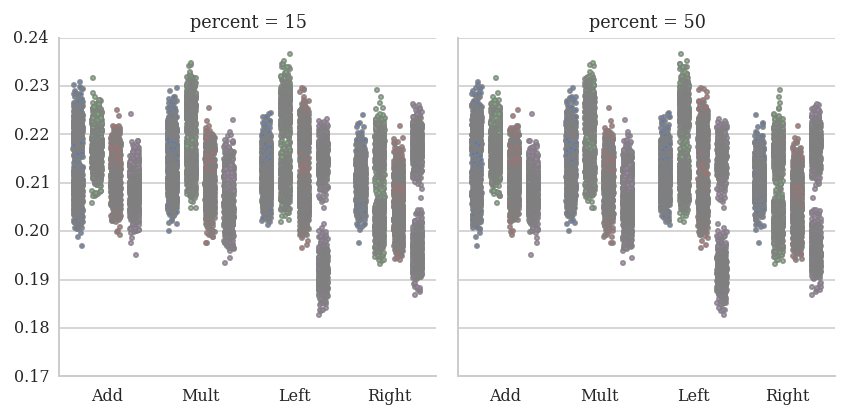

In [7]:
g = sns.FacetGrid(df,  col='percent', sharey=True);
# g.map(sns.boxplot, 'composer', 'F1', vals=df);
g.map(sns.stripplot, x='composer', y='F1', 
      hue='rep', hue_order=[0, 1, 2, -1], data=df, 
      size=2, jitter=0.2, palette='muted', edgecolor='grey', alpha=.8);

# Conclusion
Averaging reduces variance, even though it is not theoretically justified.